# Multi-Class Classification Model for [Project Name] Using Python
## version 04.0
### David Lowe
### September 14, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: [Sample Paragraph - The purpose of this project is to construct prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Glass Identification dataset is a classic multi-class classification situation where we are trying to predict one of the six possible outcomes.]

INTRODUCTION: [Sample Paragraph - The dataset involves predicting, from USA Forensic Science Service, six types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc). The study of classification of types of glass was also partly motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence…if it is correctly identified!]

ANALYSIS: [Sample Paragraph - The baseline performance of the ten algorithms achieved an average accuracy of 62.52%. Three algorithms (Bagged CART, Random Forest, and Extra Trees) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Extra Trees turned in the top result using the training data. It achieved an average accuracy of 76.51%. Using the optimized tuning parameter available, the Extra Trees algorithm processed the validation dataset with an accuracy of 73.84%, which was slightly worst than the accuracy of the training data.

CONCLUSION: [Sample Paragraph - For this iteration, the Extra Trees algorithm achieved the top-tier training and validation results. For the project, Extra Trees should be considered for further modeling or production use.]

Dataset Used: Glass Identification Dataset

Dataset ML Model: Multi-Class classification with [numerical | categorical] attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/glass+identification

One source of potential performance benchmarks: https://www.kaggle.com/uciml/glass

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'glass.data.csv'
entireDataset = read_csv(inputFile)

# Standardize the class column to the name of targetVar
entireDataset = entireDataset.rename(columns={'Type': 'targetVar'})

### 1.c) Set up the key parameters to be used in the script

In [3]:
# Create one random seed number for reproducible results
seedNum = 888

# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1

# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

         RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  targetVar
0   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00          1
1   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00          1
2   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00          1
3   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00          1
4   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00          1
5   1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26          1
6   1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00          1
7   1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00          1
8   1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00          1
9   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11          1
10  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24          1
11  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00          1
12  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24    

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(214, 10)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
targetVar      int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe   targetVar  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
targetVar    0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

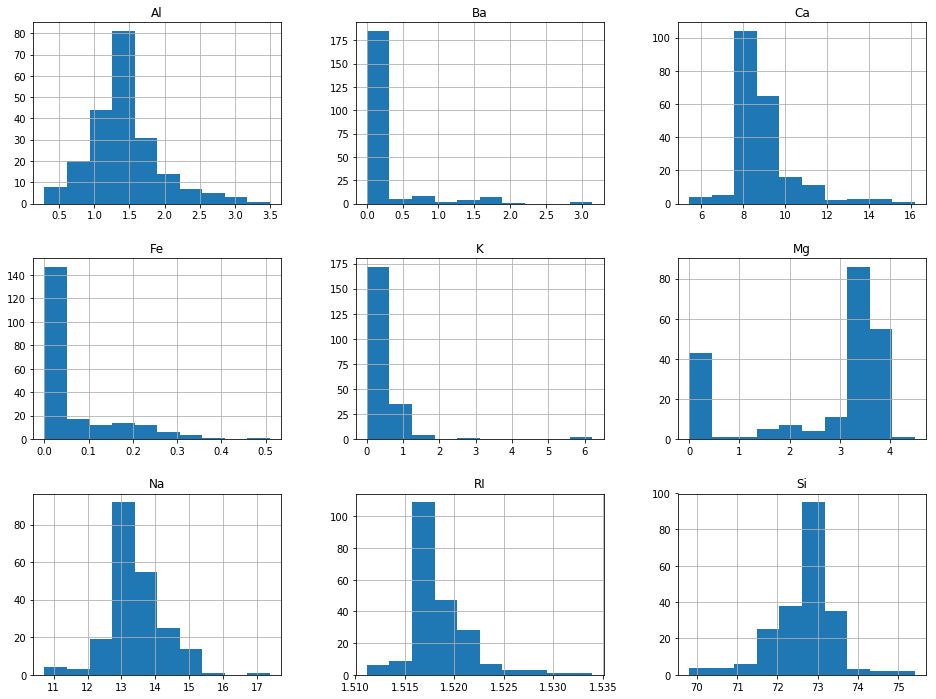

In [11]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

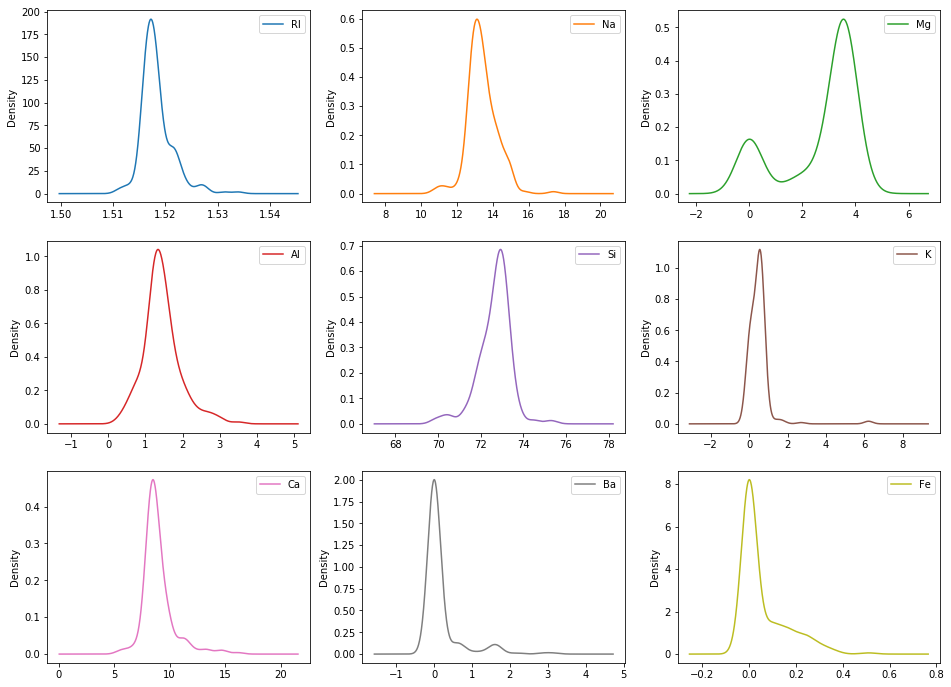

In [12]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

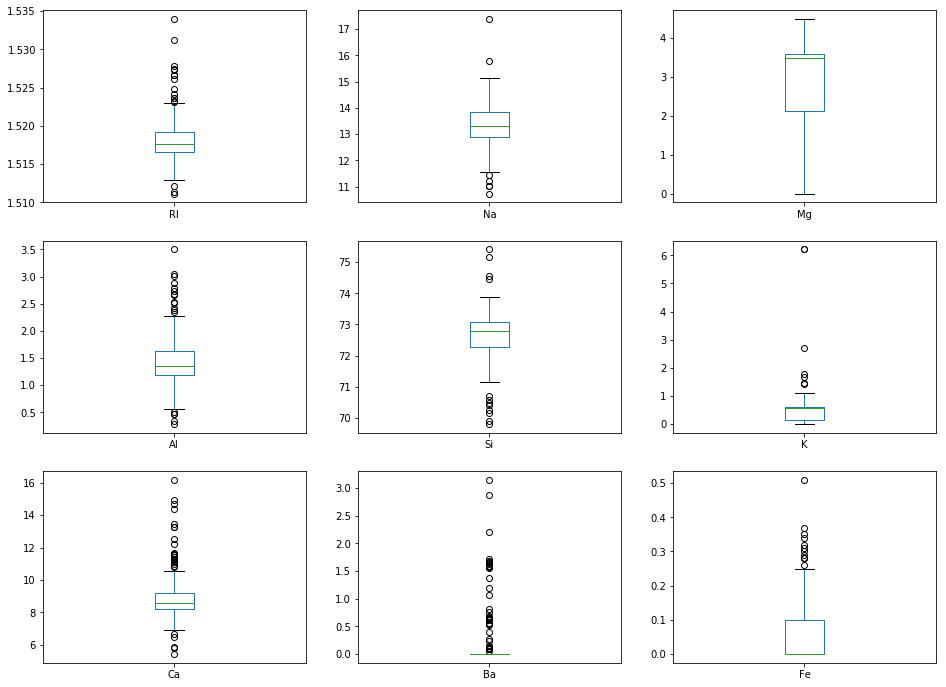

In [13]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

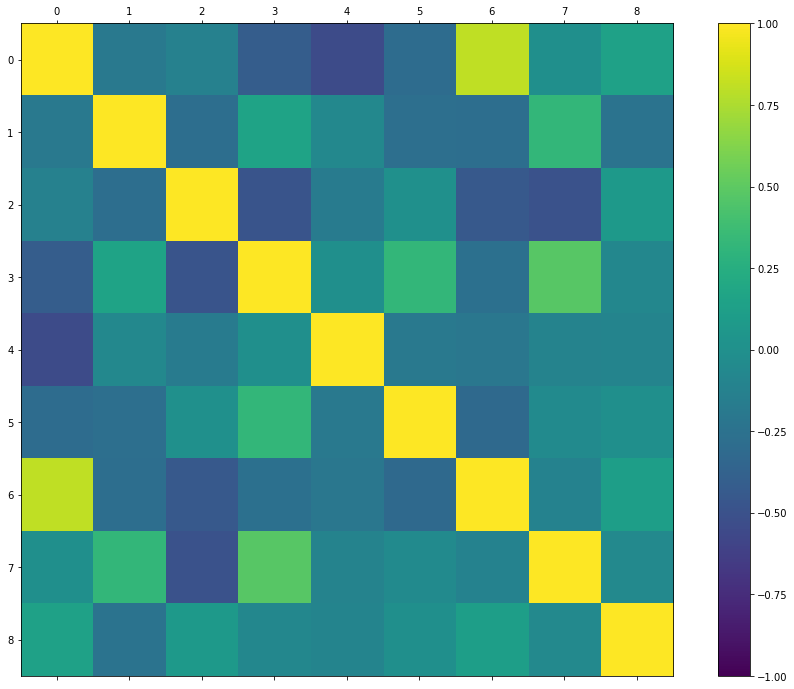

In [14]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(attributeOnly.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

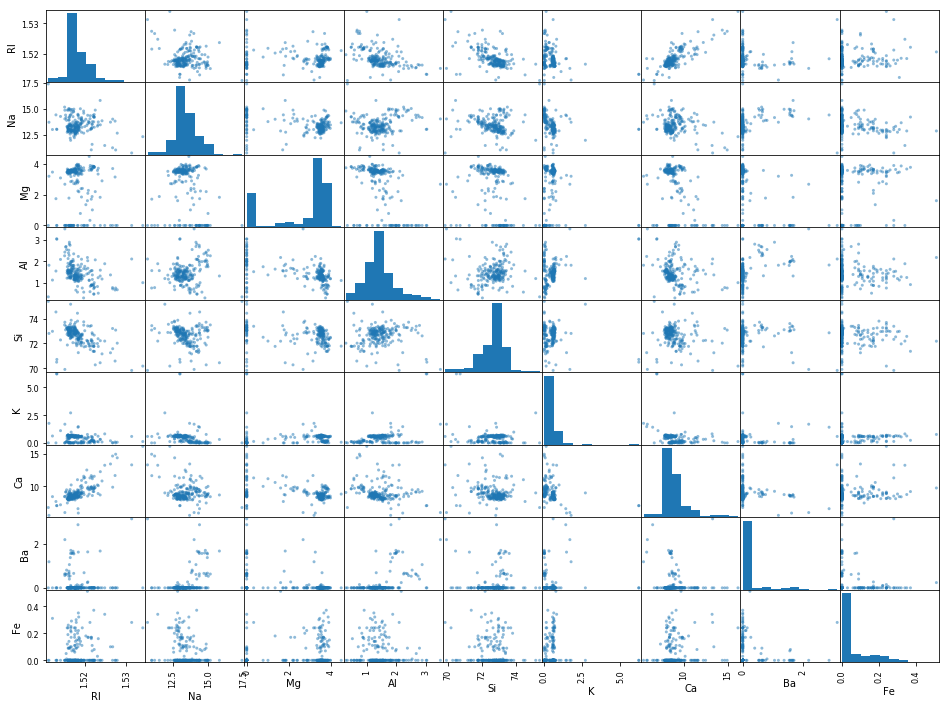

In [15]:
# Scatterplot matrix
scatter_matrix(attributeOnly)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [16]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [17]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [18]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [19]:
totAttr = len(entireDataset.columns)-1
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = entireDataset['targetVar'].values
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (214, 9) Y_entire.shape: (214,)
X_train.shape: (149, 9) Y_train.shape: (149,)
X_validation.shape: (65, 9) Y_validation.shape: (65,)
Total time for data handling and visualization: 0:00:10.130187


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Linear Discriminant Analysis

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [20]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [21]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BDT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [22]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LDA: 0.635238 (0.199366)
Model training time: 0:00:00.050969
CART: 0.675714 (0.159683)
Model training time: 0:00:00.025984
NB: 0.482381 (0.130202)

C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)



Model training time: 0:00:00.024987
KNN: 0.601905 (0.147898)
Model training time: 0:00:00.031982
SVM: 0.595714 (0.191171)
Model training time: 0:00:00.041976
BDT: 0.723333 (0.103333)
Model training time: 0:00:00.270844
RF: 0.702381 (0.144047)
Model training time: 0:00:00.218871
ET: 0.696667 (0.113969)
Model training time: 0:00:00.211879
AB: 0.456667 (0.098939)
Model training time: 0:00:01.178321
GBM: 0.682857 (0.115788)
Model training time: 0:00:03.263905
Average metrics (accuracy) from all models: 0.6252857142857143


### 4.b) Spot-checking baseline algorithms

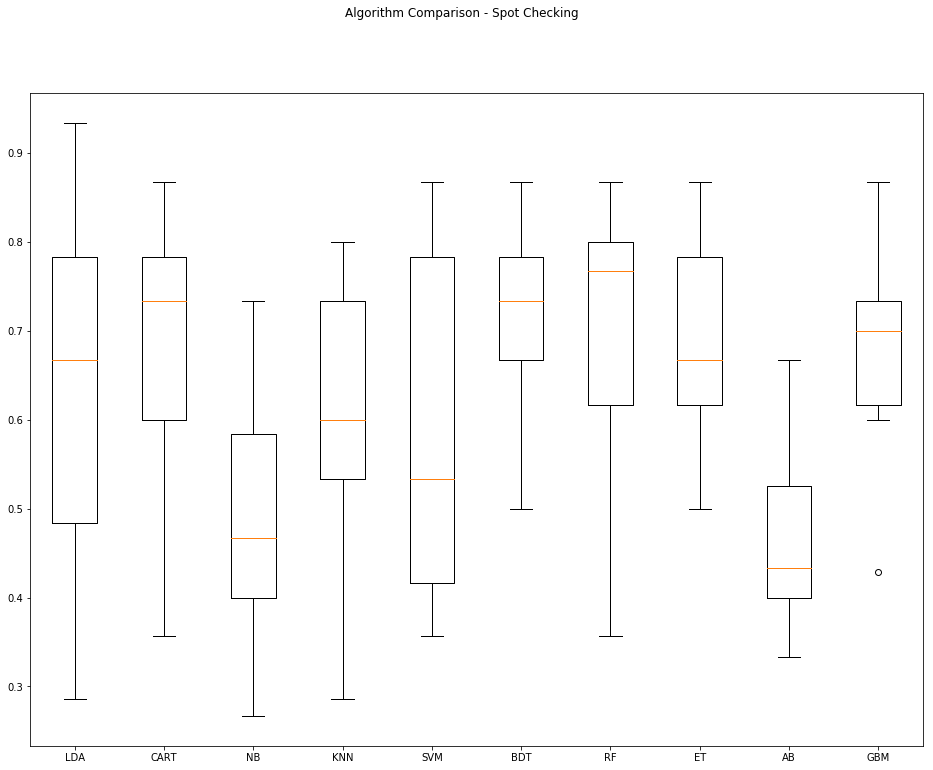

In [23]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [24]:
# Set up the comparison array
results = []
names = []

In [25]:
# Tuning algorithm #1 - Bagged Decision Trees
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([10,20,30,40,50]))
model1 = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BDT')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.751678 using {'n_estimators': 20}
0.724832 (0.102041) with: {'n_estimators': 10}
0.751678 (0.113282) with: {'n_estimators': 20}
0.738255 (0.127707) with: {'n_estimators': 30}
0.731544 (0.159294) with: {'n_estimators': 40}
0.738255 (0.137817) with: {'n_estimators': 50}
Model training time: 0:00:02.102290


In [26]:
# Tuning algorithm #2 - Random Forest
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([50,75,100,125,150]))
model2 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.744966 using {'n_estimators': 100}
0.738255 (0.141026) with: {'n_estimators': 50}
0.738255 (0.137817) with: {'n_estimators': 75}
0.744966 (0.148373) with: {'n_estimators': 100}
0.744966 (0.142214) with: {'n_estimators': 125}
0.724832 (0.137643) with: {'n_estimators': 150}
Model training time: 0:00:06.070072


In [27]:
# Tuning algorithm #3 - Extra Trees
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([50,75,100,125,150]))
model3 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.765101 using {'n_estimators': 100}
0.751678 (0.105086) with: {'n_estimators': 50}
0.751678 (0.117165) with: {'n_estimators': 75}
0.765101 (0.121839) with: {'n_estimators': 100}
0.758389 (0.128718) with: {'n_estimators': 125}
0.758389 (0.128718) with: {'n_estimators': 150}
Model training time: 0:00:05.450974


### 5.b) Compare Algorithms After Tuning

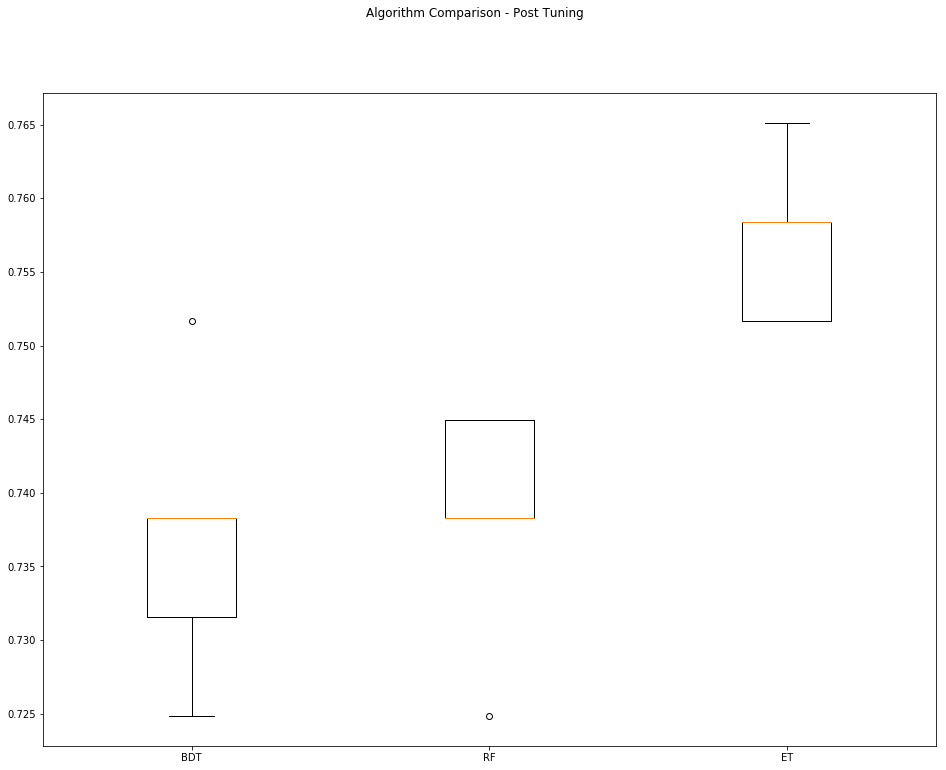

In [28]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [29]:
model = ExtraTreesClassifier(n_estimators=100, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7384615384615385
[[14  5  5  0  0  1]
 [ 0 22  0  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  1  0  0  2  0]
 [ 1  0  0  0  0  6]]
             precision    recall  f1-score   support

          1       0.78      0.56      0.65        25
          2       0.79      1.00      0.88        22
          3       0.29      0.40      0.33         5
          5       1.00      0.67      0.80         3
          6       1.00      0.67      0.80         3
          7       0.75      0.86      0.80         7

avg / total       0.76      0.74      0.73        65



### 6.b) Create standalone model on entire training dataset

In [30]:
startTimeModule = datetime.now()
finalModel = ExtraTreesClassifier(n_estimators=100)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.128042


### 6.c) Save model for later use

In [31]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:30.067030
